Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [322]:
#importing pandas and numpy libraries
import numpy as np
import pandas as pd

In [323]:
#importing dataset
data=pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [324]:
data.shape

(891, 12)

The dataset contains 891 rows and 12 columns.

In [325]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Above is a list of columns of which 'Survived' column is a label and rest are considered as features. 

In [326]:
#checking for nulls in dataset.
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observation:
- It seems like 2 columns have null values i.e. Age and Cabin
- Need to remove nulls before proceeding with creating model.

In [327]:
#since age is a continuous data i'll apply mean of age to fill null values and saving it

data['Age'].fillna(data['Age'].mean(),inplace=True)

In [328]:
#checking if there are any null values remaining
data['Age'].isnull().sum()

0

In [329]:
print('Null values present in Cabin column in % ',(687/891)*100)

#checking for unique values in Cabin column
data['Cabin'].unique()

Null values present in Cabin column in %  77.10437710437711


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Observation
- Cabin class is a categorical column with different cabin names.
- The null values present in in this column amounts to 77%

Conclusion
- According to me dropping the column will be a better option as Cabin wont play a major role in deciding survival plus it is filled with 77% of null values which will make it difficult to predict resulting in wrong results  

In [330]:
#dropping the cabin column
data=data.drop(['Cabin'],axis=1)

In [331]:
#shape after dropping "cabin"
data.shape

(891, 11)

In [332]:
data['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Observation: These are just ticket numbers that were given to customers while boarding ship. This data is of no use to us as it is not vital in predicting survival of persons. 

In [333]:
#dropping PaasengerId and Name column
data=data.drop(['PassengerId','Name','Ticket'],axis=1)

Name and ticket column is dropped in above code as according to me names and ticket data of the onboarded persons are not vital in predicting model.


In [334]:
#checking for duplicates in dataset and saving the dataset
data.drop_duplicates(inplace=True)

In [335]:
#new data shape after removing duplicates
data.shape

(780, 8)

In [336]:
#checking the columns and rows that are remaining for our analysis
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [337]:
#new shape of data after dropping 4 columns(Cabin,PassengerId,Name and Ticket)
data.shape

(780, 8)

In [338]:
#importing libraries to plot data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [339]:
#checking for unique values and count in survived column
print('unique values are ',data['Survived'].unique())
print('Value count for non survived and survived are ',data['Survived'].value_counts())

unique values are  [0 1]
Value count for non survived and survived are  0    458
1    322
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

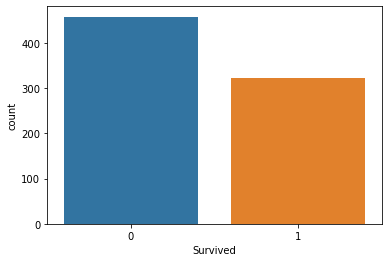

In [340]:
sns.countplot(data['Survived'])

In [341]:
#checking for unique values and count in Passenger class 
print('unique values are ',data['Pclass'].unique())
print('Value count for diffrent passenger classes are ',data['Pclass'].value_counts())

unique values are  [3 1 2]
Value count for diffrent passenger classes are  3    404
1    212
2    164
Name: Pclass, dtype: int64


Observation:
- looking at the unique values in column it seems that there were 3 passenger classes in ship.
- Looking at the count of people there were more people in 3rd class and less people in 2nd class.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

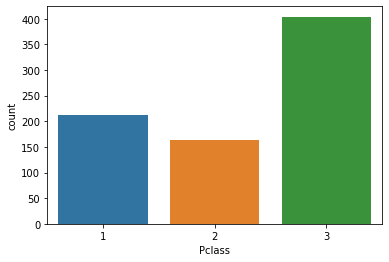

In [342]:
sns.countplot(data['Pclass'])

Observations:
- As seen above more people are concentrated in 3rd class and less in 2nd class

Value count for male and females are  male      488
female    292
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

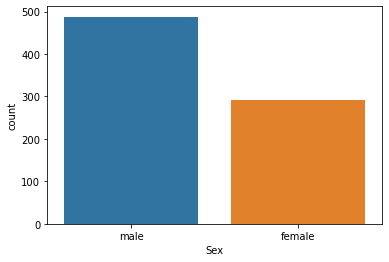

In [343]:
print('Value count for male and females are ',data['Sex'].value_counts())
sns.countplot(data['Sex'])

Observations:
- Looking at the above plot seems like more number of males were present then females in ship    

Value count for siblings and spouses present are  0    513
1    201
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

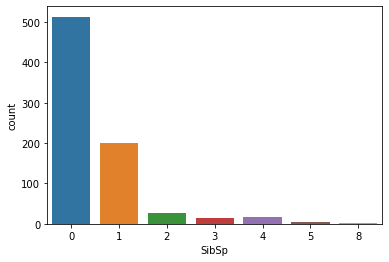

In [344]:
print('Value count for siblings and spouses present are ',data['SibSp'].value_counts())
sns.countplot(data['SibSp'])

Observations:
- seems like majority of the persons didnt come with their spouses or siblings.
- 201 ppl were accopanied by one of their spouse or sibling.
- rest remaining people were in groups of 2,3,4,5 and maximum of 8 people.

Value count for parents and children present are  0    576
1    114
2     75
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

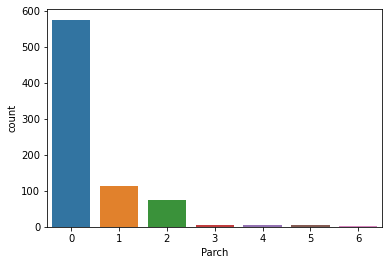

In [345]:
print('Value count for parents and children present are ',data['Parch'].value_counts())
sns.countplot(data['Parch'])

Observations
- looks like 576 people were not accompanied by their parents and children.
- rest 204 people were accompanied by their children and/or parents.

Value count for people embarked ports are  S    565
C    155
Q     58
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

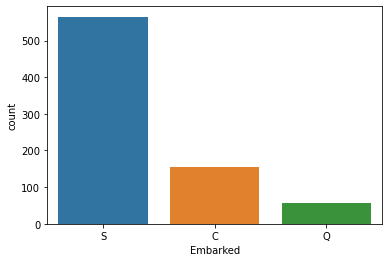

In [346]:
print('Value count for people embarked ports are ',data['Embarked'].value_counts())
sns.countplot(data['Embarked'])

observations
- most number of people were embarked from S port then C and least from Q port.

# checking how many people survived w.r.t. to passenger class

In [347]:
#checking for fare prices w.r.t to passenger class
data.groupby('Pclass')[['Fare']].mean()

,Fare
Pclass,
1,85.159631
2,21.889279
3,13.670843


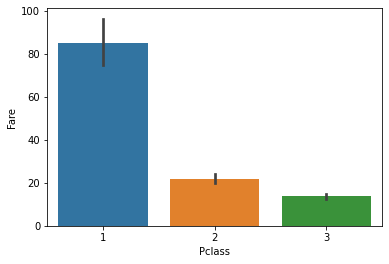

In [348]:
sns.barplot(x='Pclass',y='Fare',data=data)
plt.show()

Observation:
- The above plot shows that the fare is very high in 1st class.
- There is not much of diffence between 2nd and 3rd class but 3rd class fare is cheaper then 2nd class

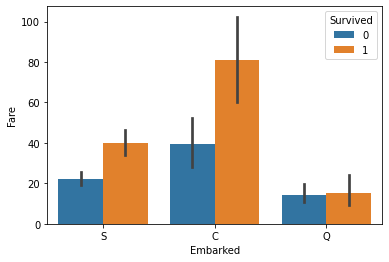

In [349]:
sns.barplot(x='Embarked',y='Fare',data=data,hue='Survived')
plt.show()

Observation: 
- This shows that those who boarded ship from C port paid higher fare then who boared from S and Q port.
- Also shows those who paid more fare do have more survival count then other persons. 

In [350]:
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.739726
male,0.217213


Observation:
- Over 74% of females survived while only 20% of males survived

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

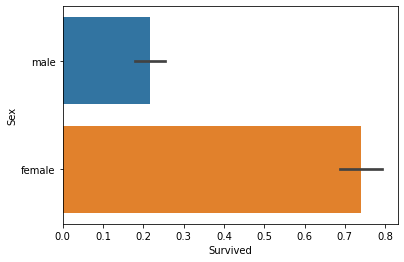

In [351]:
#plotting data of survival of male and female
sns.barplot(x='Survived',y='Sex',data=data)

In [352]:
#checking how many people from each classes survived
data.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.636792
2,0.506098
3,0.257426


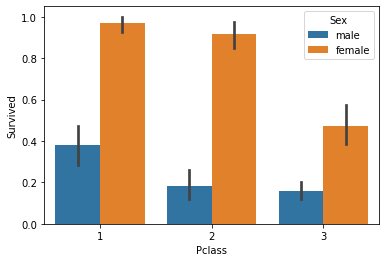

In [353]:
#plotting data for how many males and female survived from each passenger class
sns.barplot(x='Pclass',y='Survived',data=data,hue='Sex')
plt.show()

Observation:
- It seems that as said earlier females from all 3 class have more chances of survival then men.
- But compared to all three passenger classes females and males from 1st and 2nd class survived more then 3rd class.


In [354]:
#checking relation for people survived between passenger class and ticket fare
data.groupby('Pclass')[['Survived','Fare']].mean()

,Survived,Fare
Pclass,,
1,0.636792,85.159631
2,0.506098,21.889279
3,0.257426,13.670843


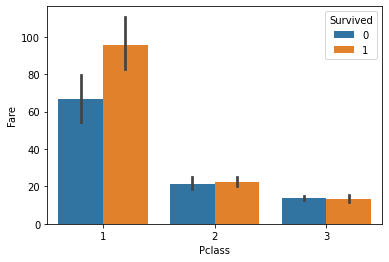

In [355]:
sns.barplot(x='Pclass',y='Fare',data=data,hue='Survived')
plt.show()

Observation:
- with above plot it looks like the people who paid more for ticket have higher chances of survival i.e. people from 1st class are survived more then 2nd class and then 3rd class.   

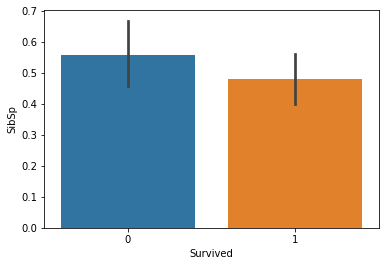

In [356]:
sns.barplot(x='Survived',y='SibSp',data=data)
plt.show()

Observation:
- above plot shows that less number of siblings/spouse survived then died.    

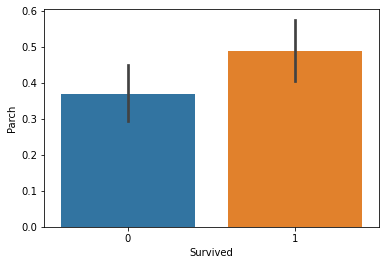

In [357]:
sns.barplot(x='Survived',y='Parch',data=data)
plt.show()

Observation:
- above plot shows that older people(parents/grandparents) and children survived more then died.

In [358]:
#describing the dataset
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,29.797600,0.525641,0.417949,34.829108
std,0.492657,0.854452,13.708883,0.988046,0.838536,52.263440
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.950000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations:
- Survived is label(categorical) with values of 0 and 1 hence min. is 0(dead) and max. is 1(alive).   
- Pclass is categorical column with only 1,2 and 3 interpreting passenger classes.
- Age is continuous data with mean as 29.79 interpreting most of the passengers were in that age bracket. The min age of     passenger was 4 months old(0.42) and max age was 80 years.
- SibSp and Parch are categorical columns.
- Fare is continuous column with average fare price in range of 34.82 pounds. The max. fare paid by passenger is 512.32 pounds,
- the deviation of fare is higher interpreting that the data is widely distributed.

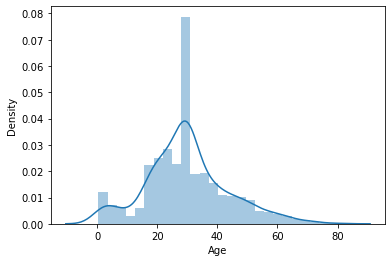

In [359]:
#plotting distribution plots for Age and Fare
sns.distplot(data['Age'])
plt.show()

Observation:
- The plot shows presence of outliers.

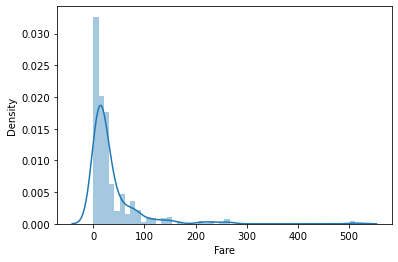

In [360]:
sns.distplot(data['Fare'])
plt.show()

Observation:
- The fare data is right skewed.

In [361]:
#checking for skewness values
print('skewness for age data is ',data['Age'].skew())
print('skewness for fare data is ',data['Fare'].skew())

skewness for age data is  0.3974000790014584
skewness for fare data is  4.561009669645996


Observation: Since the skewness value for age is within 0.5 hence distribution is almost symmetrical. Hence we need not apply power transforming method that reduces skewness.

In [362]:
#using power transformer to remove skewness

#importing libraries for power transformer and Standard Scaler
from sklearn.preprocessing import StandardScaler,PowerTransformer

features=['Fare']
scaler=PowerTransformer(method='yeo-johnson')

data[features]=scaler.fit_transform(data[features])


In [363]:
print('skewness for fare data after transforming is ',data['Fare'].skew())

skewness for fare data after transforming is  -0.041013733506485385


Observation:
- It is seen that after applying power transformer method skewness reduced from 4.56 to -0.04.

In [364]:
data.shape

(780, 8)

In [365]:
#checking for outliers in 'Age' and 'Fare' data

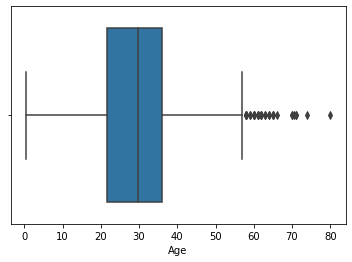

In [366]:
sns.boxplot(data['Age'])
plt.show()

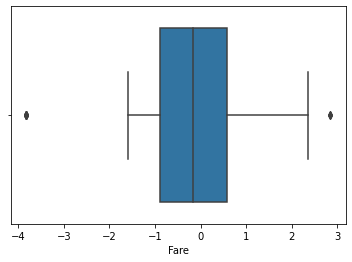

In [367]:
 sns.boxplot(data['Fare'])
plt.show()

observation for both above plot:
- seems like both columns i.e fare and age have outliers, hence outliers will be removed using z-score method.


In [368]:
#importing library
from scipy.stats import zscore

z_score=zscore(data[['Age','Fare']])


In [369]:
abs_z_score=np.abs(z_score)

In [370]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [371]:
data=data[filtering_entry]

In [372]:
#shape of dataset after removing outliers
data.shape

(767, 8)

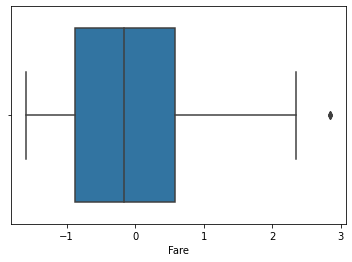

In [373]:
#plots to show that datapoints that lying in std>3 are removed
sns.boxplot(data['Fare'])
plt.show()

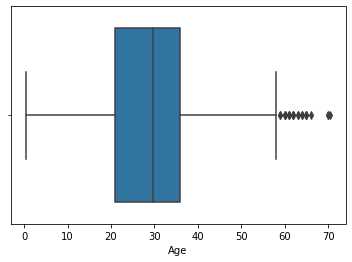

In [374]:
sns.boxplot(data['Age'])
plt.show()

In [ ]:
#applying encoders to sex and embarked data.

In [381]:
#importing library for label encoder

from sklearn.preprocessing import LabelEncoder

label_enc=LabelEncoder()


In [382]:
df1=label_enc.fit_transform(data['Sex'])
df2=label_enc.fit_transform(data['Embarked'])

In [383]:
data['Sex']=df1
data['Embarked']=df2

In [387]:
#checking encoded data in male and embarked
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,-0.988913,2
1,1,1,0,38.0,1,0,1.266946,0
2,1,3,0,26.0,0,0,-0.896339,2
3,1,1,0,35.0,1,0,0.999125,2
4,0,3,1,35.0,0,0,-0.880059,2


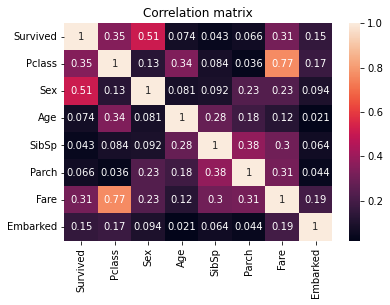

In [388]:
#plotting the correlation matrix

corr=np.abs(data.corr())
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

Observations:
- Pclass does have very good correlation with fare.Pclass also shows fair correlation with survived and passenger class.
- Age,SibSp and Parch columns little to none correlation with Survival.
- as shown in barplots, fare shows correlation with survived.
- Sex is most correlated with survival and has fair coorelation with Parch and fare.


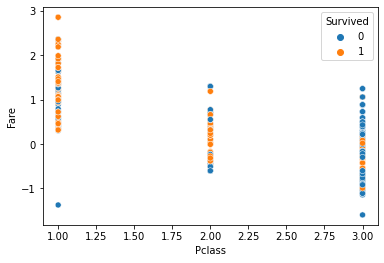

In [394]:
#scatter plots to show correlation between features and label
sns.scatterplot(x='Pclass',y='Fare',hue='Survived',datSur=data)
plt.show()

observation:
This plot shows that persons from 1st class survived more than persons from 3rd class. Mortality is more in 3rd class.

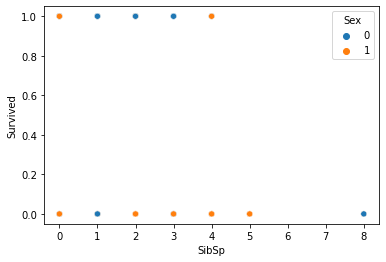

In [407]:
sns.scatterplot(x='SibSp',y='Survived',hue='Sex',data=data)
plt.show()

Value: sex: 1 for male and 0 for female
       Survived: 1 for survived and 0 for dead
Observation:
- looking at the plot seems like wifes/sisters survived more then husbands/brothers.    

# since features are less, they will not be dropped. Hence moving forward with model evaluation.

In [414]:
#Standardizing data
scaler=StandardScaler()

In [416]:
#diving data into features and labels
x=data.drop(['Survived'],axis=1)
y=data['Survived']

In [417]:
#standardizing features
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[ 0.87828909  0.78405156 -0.56119679 ... -0.50401873 -1.12688671
   0.58388616]
 [-1.47301189 -1.27542633  0.63306877 ... -0.50401873  1.33516094
  -1.89037176]
 [ 0.87828909 -1.27542633 -0.2626304  ... -0.50401873 -1.02585202
   0.58388616]
 ...
 [ 0.87828909 -1.27542633  0.01347765 ...  1.86765222  0.18674402
   0.58388616]
 [-1.47301189  0.78405156 -0.2626304  ... -0.50401873  0.451334
  -1.89037176]
 [ 0.87828909  0.78405156  0.18521918 ... -0.50401873 -1.05120185
  -0.6532428 ]]


In [424]:
#Logistic Regression Model
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [427]:
#assigning variable to model
lr=LogisticRegression()

In [430]:
#finding best random state for model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)

training accuracy is  78.26086956521739  for random state  0
testing accuracy is  78.125  for random state  0
training accuracy is  76.52173913043478  for random state  1
testing accuracy is  82.8125  for random state  1
training accuracy is  78.6086956521739  for random state  2
testing accuracy is  76.04166666666666  for random state  2
training accuracy is  77.56521739130436  for random state  3
testing accuracy is  75.0  for random state  3
training accuracy is  77.91304347826087  for random state  4
testing accuracy is  79.6875  for random state  4
training accuracy is  77.39130434782608  for random state  5
testing accuracy is  81.25  for random state  5
training accuracy is  78.78260869565217  for random state  6
testing accuracy is  75.0  for random state  6
training accuracy is  77.56521739130436  for random state  7
testing accuracy is  81.25  for random state  7
training accuracy is  78.95652173913044  for random state  8
testing accuracy is  76.04166666666666  for random st

In [464]:
#initiating train test split thereafter model training
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=0)

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))

In [465]:
#training the model
lr.fit(x_train,y_train)

LogisticRegression()

In [469]:
#passing the function
metric_score(lr,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(lr,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:78.26%
-----Testing score-----
Accuracy score:78.12%
classification report 
               precision    recall  f1-score   support

           0       0.76      0.85      0.81       102
           1       0.81      0.70      0.75        90

    accuracy                           0.78       192
   macro avg       0.79      0.78      0.78       192
weighted avg       0.78      0.78      0.78       192

confusion matrix  [[87 15]
 [27 63]]


In [470]:
# using cross validation score to check if model is overfitted

#uploading cross validation library
from sklearn.model_selection import cross_val_score

In [471]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(lr,x_scaled,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  76.53088283289817
At cv:- 3
cross validation score:-  76.53339460784314
At cv:- 4
cross validation score:-  76.92926483420592
At cv:- 5
cross validation score:-  76.92386045327223
At cv:- 6
cross validation score:-  76.53584317585302
At cv:- 7
cross validation score:-  76.79137376385083
At cv:- 8
cross validation score:-  77.05866228070175
At cv:- 9
cross validation score:-  76.66058671530628
At cv:- 10
cross validation score:-  77.06254272043746
At cv:- 11
cross validation score:-  77.06380575945792


In [472]:
#cross validation score
print('Cross Validation Score for Logistic regression model :- ',((cross_val_score(lr,x_scaled,y,cv=11).mean())*100))

Cross Validation Score for Logistic regression model :-  77.06380575945792


# Random Forests

In [473]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [476]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [477]:
#finding best random state for random forests model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_train)
    pred=rf.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)

training accuracy is  98.60869565217392  for random state  0
testing accuracy is  73.95833333333334  for random state  0
training accuracy is  98.08695652173913  for random state  1
testing accuracy is  75.52083333333334  for random state  1
training accuracy is  97.91304347826087  for random state  2
testing accuracy is  80.20833333333334  for random state  2
training accuracy is  98.08695652173913  for random state  3
testing accuracy is  72.39583333333334  for random state  3
training accuracy is  97.91304347826087  for random state  4
testing accuracy is  76.04166666666666  for random state  4
training accuracy is  98.26086956521739  for random state  5
testing accuracy is  80.72916666666666  for random state  5
training accuracy is  98.60869565217392  for random state  6
testing accuracy is  78.125  for random state  6
training accuracy is  98.43478260869564  for random state  7
testing accuracy is  77.60416666666666  for random state  7
training accuracy is  98.43478260869564  fo

In [481]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [487]:
#initiating train test split thereafter model training
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=35)

In [488]:
#passing the function
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:98.26%
-----Testing score-----
Accuracy score:80.21%
classification report 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       115
           1       0.77      0.71      0.74        77

    accuracy                           0.80       192
   macro avg       0.80      0.79      0.79       192
weighted avg       0.80      0.80      0.80       192

confusion matrix  [[99 16]
 [22 55]]


In [491]:
#finding best value for cv in provided range
for i in range(2,30):
    cv_score=cross_val_score(rf,x_scaled,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  75.09791122715404
At cv:- 3
cross validation score:-  76.0125612745098
At cv:- 4
cross validation score:-  76.79496618673647
At cv:- 5
cross validation score:-  77.0622188269247
At cv:- 6
cross validation score:-  77.58058562992126
At cv:- 7
cross validation score:-  76.5352079113547
At cv:- 8
cross validation score:-  76.40899122807016
At cv:- 9
cross validation score:-  76.02523179814563
At cv:- 10
cross validation score:-  76.53793574846206
At cv:- 11
cross validation score:-  77.44776962168267
At cv:- 12
cross validation score:-  75.36789021164022
At cv:- 13
cross validation score:-  76.79269882659713
At cv:- 14
cross validation score:-  77.59018759018758
At cv:- 15
cross validation score:-  77.0739064856712
At cv:- 16
cross validation score:-  76.67054521276594
At cv:- 17
cross validation score:-  77.20375106564364
At cv:- 18
cross validation score:-  77.19023009720685
At cv:- 19
cross validation score:-  77.73106546854942
At cv:- 20
cross valid

In [493]:
#cross validation score
print('Cross Validation Score for Random Forests model :- ',((cross_val_score(rf,x_scaled,y,cv=20).mean())*100))

Cross Validation Score for Random Forests model :-  77.73954116059379


# Gradient Boosting Classifier

In [499]:
from sklearn.ensemble import GradientBoostingClassifier

In [500]:
#saving model in variable
gbdt=GradientBoostingClassifier()

In [501]:
#training model
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [502]:
#finding best random state for Gradient boosted tees model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    gbdt.fit(x_train,y_train)
    y_pred=gbdt.predict(x_train)
    pred=gbdt.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)

training accuracy is  89.73913043478261  for random state  0
testing accuracy is  80.20833333333334  for random state  0
training accuracy is  88.8695652173913  for random state  1
testing accuracy is  82.8125  for random state  1
training accuracy is  90.26086956521739  for random state  2
testing accuracy is  81.25  for random state  2
training accuracy is  89.91304347826087  for random state  3
testing accuracy is  81.25  for random state  3
training accuracy is  89.04347826086956  for random state  4
testing accuracy is  78.64583333333334  for random state  4
training accuracy is  88.17391304347825  for random state  5
testing accuracy is  82.8125  for random state  5
training accuracy is  90.08695652173913  for random state  6
testing accuracy is  79.6875  for random state  6
training accuracy is  89.04347826086956  for random state  7
testing accuracy is  85.41666666666666  for random state  7
training accuracy is  89.21739130434783  for random state  8
testing accuracy is  75.0 

In [657]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [658]:
#initiating train test split thereafter model training
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=1)

In [659]:
#passing the function
metric_score(gbdt,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(gbdt,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:88.87%
-----Testing score-----
Accuracy score:82.81%
classification report 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       114
           1       0.85      0.71      0.77        78

    accuracy                           0.83       192
   macro avg       0.83      0.81      0.82       192
weighted avg       0.83      0.83      0.82       192

confusion matrix  [[104  10]
 [ 23  55]]


In [660]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(gbdt,x_scaled,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  79.14082898172323
At cv:- 3
cross validation score:-  78.61928104575163
At cv:- 4
cross validation score:-  78.75286321989529
At cv:- 5
cross validation score:-  79.14438502673798
At cv:- 6
cross validation score:-  78.36491141732283
At cv:- 7
cross validation score:-  80.05361610866197
At cv:- 8
cross validation score:-  79.66694078947368
At cv:- 9
cross validation score:-  79.02568779449764
At cv:- 10
cross validation score:-  79.66165413533834
At cv:- 11
cross validation score:-  79.26971579145491


In [510]:
#cross validation score
print('Cross Validation Score for Gradient Boosting Tees model :- ',((cross_val_score(gbdt,x_scaled,y,cv=7).mean())*100))

Cross Validation Score for Gradient Boosting Tees model :-  80.05361610866197


# support vector classifier

In [511]:
#importing library
from sklearn.svm import SVC
svc=SVC()

In [513]:
#fitting model to dataset
svc.fit(x_train,y_train)

SVC()

In [525]:
#finding best random state for Support Vector Classifier model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    svc.fit(x_train,y_train)
    y_pred=svc.predict(x_train)
    pred=svc.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)

training accuracy is  82.26086956521739  for random state  0
testing accuracy is  78.64583333333334  for random state  0
training accuracy is  82.95652173913044  for random state  1
testing accuracy is  78.125  for random state  1
training accuracy is  81.73913043478261  for random state  2
testing accuracy is  80.72916666666666  for random state  2
training accuracy is  83.1304347826087  for random state  3
testing accuracy is  77.08333333333334  for random state  3
training accuracy is  81.04347826086956  for random state  4
testing accuracy is  81.77083333333334  for random state  4
training accuracy is  82.08695652173913  for random state  5
testing accuracy is  82.29166666666666  for random state  5
training accuracy is  82.6086956521739  for random state  6
testing accuracy is  78.64583333333334  for random state  6
training accuracy is  80.69565217391305  for random state  7
testing accuracy is  84.375  for random state  7
training accuracy is  83.1304347826087  for random state

In [520]:
svc.fit(x_train,y_train)

SVC()

In [526]:
#initiating train test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=2)

In [527]:
#passing the function
metric_score(svc,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(svc,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:81.91%
-----Testing score-----
Accuracy score:81.77%
classification report 
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.85      0.72      0.78        87

    accuracy                           0.82       192
   macro avg       0.82      0.81      0.81       192
weighted avg       0.82      0.82      0.82       192

confusion matrix  [[94 11]
 [24 63]]


In [528]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(svc,x_scaled,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  78.48876740644037
At cv:- 3
cross validation score:-  78.7515318627451
At cv:- 4
cross validation score:-  79.27574171029669
At cv:- 5
cross validation score:-  79.79458450046685
At cv:- 6
cross validation score:-  80.06069553805774
At cv:- 7
cross validation score:-  80.05480757774336
At cv:- 8
cross validation score:-  80.32072368421052
At cv:- 9
cross validation score:-  79.53640370877034
At cv:- 10
cross validation score:-  79.53691045796309
At cv:- 11
cross validation score:-  79.67061923583664


In [529]:
#cross validation score
print('Cross Validation Score for Support Vector Classifier model :- ',((cross_val_score(svc,x_scaled,y,cv=8).mean())*100))

Cross Validation Score for Support Vector Classifier model :-  80.32072368421052


# Dataframe showing model_wise training & testing accuracy scores with cross validation scores

In [668]:
column=pd.DataFrame({'Model':['Logistic Regression','Random Forests','Gradient Boosted Tees','Support Vector Classifier'],
                    'Training scores':[78.26,98.26,88.87,81.91],
                    'Testing scores':[78.12,80.21,82.81,81.77],
                    'Cross validation score':[77.06,77.73,80.05,80.32],
                    'False positives':[15,16,10,11],
                    'False negatives':[27,22,23,24]})
column

,Model,Training scores,Testing scores,Cross validation score,False positives,False negatives
0,Logistic Regression,78.26,78.12,77.06,15,27
1,Random Forests,98.26,80.21,77.73,16,22
2,Gradient Boosted Tees,88.87,82.81,80.05,10,23
3,Support Vector Classifier,81.91,81.77,80.32,11,24


Looking at above dataframe going forward with Gradient Boosted Tees as it has higher training and test scores with good cross validation scores. Also it has less number of false positives and false negatives.

# Hyperparameter tuning to Gradient Boosted Tees

In [533]:
#importing GridSearchCV library
from sklearn.model_selection import GridSearchCV

In [661]:
#setting parameters for tuning
grid_param=[{'max_depth':range(2,25),
           'min_samples_split':range(2,15),
           'learning_rate':np.arange(0.1,0.9)}]

In [662]:
#saving model in variable
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)

In [663]:
#fitting the model on train data
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': array([0.1]),
                          'max_depth': range(2, 25),
                          'min_samples_split': range(2, 15)}])

In [664]:
#best parameters for tuning
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 3}

In [729]:
#using best parameters to train 
gbdt_clf=GradientBoostingClassifier(loss='exponential',learning_rate=0.13,max_depth=3,min_samples_split=2,n_estimators=125)

In [730]:
#training data
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.13, loss='exponential',
                           n_estimators=125)

In [731]:
#passing the function
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:90.26%
-----Testing score-----
Accuracy score:82.81%
classification report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.83      0.73      0.78        78

    accuracy                           0.83       192
   macro avg       0.83      0.81      0.82       192
weighted avg       0.83      0.83      0.83       192

confusion matrix  [[102  12]
 [ 21  57]]


In [739]:
y_pred=gbdt_clf.predict(x_train)
pred=gbdt_clf.predict(x_test)
print(f'Training accuracy score for Gradient Boosted Tees after hyperparameter tuning:{accuracy_score(y_train,y_pred)*100:.2f}%')
print(f'Testing accuracy score for Gradient Boosted Tees after hyperparameter tuning:{accuracy_score(y_test,pred)*100:.2f}%')

Training accuracy score for Gradient Boosted Tees after hyperparameter tuning:90.26%
Testing accuracy score for Gradient Boosted Tees after hyperparameter tuning:82.81%


# plotting ROC curve

In [732]:
#importing ROC curve library
from sklearn.metrics import roc_curve,auc

In [734]:
pred=gbdt_clf.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.10526316 1.        ]
tpr [0.         0.73076923 1.        ]
threshold [2 1 0]


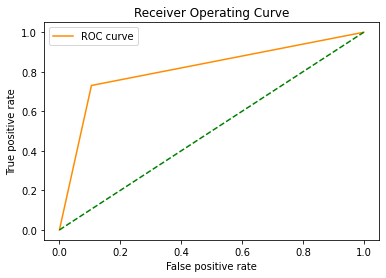

In [735]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# saving the model

In [740]:
import pickle

In [741]:
pickle.dump(gbdt_clf,open('titanic_gbdt','wb'))